In [311]:
import nltk
import string
import numpy as np
import pandas as pd
import nltk

from collections import defaultdict
from collections import Counter

In [7]:
def tokenize(text):
    stem = nltk.stem.SnowballStemmer('english')
    text = text.lower()
    for token in nltk.word_tokenize(text):
        if token in string.punctuation: continue
        yield stem.stem(token)

   

In [272]:
 corpus = [
    "The elephant sneezed at the sight of potatoes as promised.",
    "Bats can see via echolocation. See the bat sight sneeze!",
    "Wondering, she opened the door to the studio.",
    ]

In [40]:
labels = np.array([1,2,1])

### 4 types of vector encoding<br>
1) frequency,<br>
2) one-hot, <br>
3) TF–IDF, <br>
4) distributed representations

### 3 approaches<br>
1) NLTK<br>
2) Scikit-Learn,<br>
3) Gensim

# 1.Frequency Vectors

Because they disregard grammar and the relative position of words in documents,
frequency-based encoding methods suffer from the long tail, or Zipfian distribution,
that characterizes natural language. As a result, tokens that occur very frequently are
orders of magnitude more “significant” than other, less frequent ones. This can have a
significant impact on some models (e.g., generalized linear models) that expect nor‐
mally distributed features.

## Vectorization with {}, defaultdict, Counter

In [50]:
# naive implemetation using dict
def vectorize_dict_with_labels(corpus, labels):
    freqs = {}
    for l, doc in zip(labels, corpus):
        for token in tokenize(doc):
            pair = (token, l)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [51]:
vectorize_dict_with_labels(corpus, labels)

{('as', 1): 1,
 ('at', 1): 1,
 ('bat', 2): 2,
 ('can', 2): 1,
 ('door', 1): 1,
 ('echoloc', 2): 1,
 ('eleph', 1): 1,
 ('of', 1): 1,
 ('open', 1): 1,
 ('potato', 1): 1,
 ('promis', 1): 1,
 ('see', 2): 2,
 ('she', 1): 1,
 ('sight', 1): 1,
 ('sight', 2): 1,
 ('sneez', 1): 1,
 ('sneez', 2): 1,
 ('studio', 1): 1,
 ('the', 1): 4,
 ('the', 2): 1,
 ('to', 1): 1,
 ('via', 2): 1,
 ('wonder', 1): 1}

In [88]:
# naive implemetation using dict
def vectorize_dict(doc):
    freqs = {}
    for token in tokenize(doc):
        if token in freqs:
            freqs[token] += 1
        else:
            freqs[token] = 1

    return freqs

In [89]:
vectorize_dict(corpus[0])

{'as': 1,
 'at': 1,
 'eleph': 1,
 'of': 1,
 'potato': 1,
 'promis': 1,
 'sight': 1,
 'sneez': 1,
 'the': 2}

In [91]:
# bad method
vectorize_dict(corpus[0])["ddd"]

KeyError: 'ddd'

In [48]:
def vectorize_defaultdict(doc):
    freqs = defaultdict(int)
    for token in tokenize(doc):
        freqs[token] += 1
    return freqs    

In [92]:
# bad method as doc lengths can be different
# solve problem of dict for None keys
# hard to get most_common words, needs to be sorted and cut the top
# also you have to count freqs by +1
vectorize_defaultdict(corpus[0])

defaultdict(int,
            {'as': 1,
             'at': 1,
             'eleph': 1,
             'of': 1,
             'potato': 1,
             'promis': 1,
             'sight': 1,
             'sneez': 1,
             'the': 2})

In [93]:
vectorize_defaultdict(corpus[0])['ddddd']

0

In [94]:
# most frequent 2
sorted(vectorize_defaultdict(corpus[0]))[-2:]

['sneez', 'the']

In [116]:
# can't create directly from token_array
defaultdict(tokenize(corpus[0]))

TypeError: first argument must be callable or None

In [117]:
def vectorize_counter(doc):
    # can create directly from token_array
    freqs = Counter(tokenize(doc))

    return freqs    

In [118]:
# advantages compare with defaultdict
# also suppots None Keys, outputs as 0
# no need manually add +1,
# has function most_common(), returns also freqs
vectorize_counter(corpus[0])

Counter({'as': 1,
         'at': 1,
         'eleph': 1,
         'of': 1,
         'potato': 1,
         'promis': 1,
         'sight': 1,
         'sneez': 1,
         'the': 2})

In [119]:
vectorize_counter(corpus[0])['dddd']

0

In [120]:
vectorize_counter(corpus[0]).most_common(2)

[('the', 2), ('eleph', 1)]

In [121]:
# mostly the same as Counter
# nltk.probability.FreqDist is a subclass of collections.Counter
def vectorize_nltk(doc):
    freqs = nltk.FreqDist(tokenize(doc))
    
    return freqs 

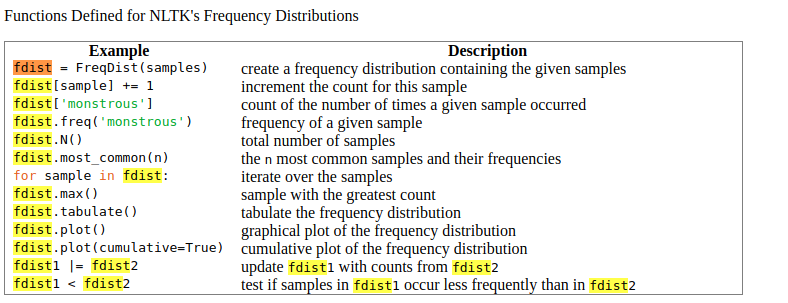

In [122]:
vectorize_nltk(corpus[0])

FreqDist({'the': 2, 'eleph': 1, 'sight': 1, 'promis': 1, 'as': 1, 'sneez': 1, 'potato': 1, 'of': 1, 'at': 1})

## Sklearn

feature_extraction.text.CountVectorizer -> Convert a collection of text documents to a matrix of token counts

feature_extraction.text.HashingVectorizer -> Convert a collection of text documents to a matrix of token occurrences

feature_extraction.text.TfidfTransformer -> Transform a count matrix to a normalized tf or tf-idf representation

feature_extraction.text.TfidfVectorizer -> Convert a collection of raw documents to a matrix of TF-IDF features.

In [134]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

In [181]:
# has get_stop_words()/ get_feature_names()
def vectorize_sklearn(corpus):
    vectors = CountVectorizer().fit_transform(corpus)
    
    return vectors 


vectors = vectorize_sklearn(corpus)

has its own internal tokenization and normalization methods.

The fit method of the
vectorizer expects an iterable or list of strings or file objects, and creates a dictionary
of the vocabulary on the corpus.

When transform is called, each individual docu‐
ment is transformed into a sparse array whose index tuple is the row (the document
ID) and the token ID from the dictionary, and whose value is the count:

In [182]:
vectors.todense()

matrix([[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0,
         0],
        [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1,
         0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0,
         1]])

In [141]:
#doc, length = doc length, encoding for individual words
vectors_doc = CountVectorizer().fit_transform(tokenize(corpus[0]))
vectors_doc.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [163]:
vectors_h = HashingVectorizer().fit_transform(tokenize(corpus[0]))
vectors_h.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

## Gensim

In [146]:
import gensim

In [203]:
def vectorize_gensim(corpus):
    docs_tokenized = [tokenize(doc) for doc in corpus]
    id2word = gensim.corpora.Dictionary(docs_tokenized)
    print("id2word", list(id2word))
    
    vectors = [
        id2word.doc2bow(tokenize(doc)) for doc in corpus
    ]
    
    return vectors 



In [204]:
vectorize_gensim(corpus)

id2word [4, 5, 17, 11, 0, 9, 7, 13, 15, 16, 12, 8, 2, 6, 18, 14, 1, 3, 19, 10]


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2)],
 [(6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 2), (13, 1)],
 [(8, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]]

In [178]:
list(docs_tokenized[0])

[]

In [180]:
corpus

['The elephant sneezed at the sight of potatoes as promised.',
 'Bats can see via echolocation. See the bat sight sneeze!',
 'Wondering, she opened the door to the studio.']

In [212]:
#unique words
vocab = set([token for doc in corpus for token in tokenize(doc)])
vocab

{'as',
 'at',
 'bat',
 'can',
 'door',
 'echoloc',
 'eleph',
 'of',
 'open',
 'potato',
 'promis',
 'see',
 'she',
 'sight',
 'sneez',
 'studio',
 'the',
 'to',
 'via',
 'wonder'}

In [213]:
len(vocab)

20

# 2.One-Hot Encoding

A solution to above problem is one-hot encoding, a boolean vector encoding method. One-hot encoding reduces the imbalance issue of the distribution of tokens, simplify‐
ing a document to its constituent components. This reduction is most effective for
very small documents (sentences, tweets) that don’t contain very many repeated ele‐
ments, and is usually applied to models that have very good smoothing properties.
One-hot encoding is also commonly used in artificial neural networks, whose activa‐
tion functions require input to be in the discrete range of [0,1] or [-1,1] .

### NLTK

In [219]:
def one_hot_nltk(doc):
    return {
        token: 1
        for token in tokenize(doc)
        }
vectors = map(one_hot_nltk, corpus)
list(vectors)

[{'as': 1,
  'at': 1,
  'eleph': 1,
  'of': 1,
  'potato': 1,
  'promis': 1,
  'sight': 1,
  'sneez': 1,
  'the': 1},
 {'bat': 1,
  'can': 1,
  'echoloc': 1,
  'see': 1,
  'sight': 1,
  'sneez': 1,
  'the': 1,
  'via': 1},
 {'door': 1, 'open': 1, 'she': 1, 'studio': 1, 'the': 1, 'to': 1, 'wonder': 1}]

### Scikit-Learn

In [220]:
from sklearn.preprocessing import Binarizer

In [228]:
freqs = vectorize_sklearn(corpus)
freqs.todense()

matrix([[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0,
         0],
        [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1,
         0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0,
         1]])

In [223]:
one_hot_sk = Binarizer()

In [231]:
# attention!! difference from CountVectorizer is that count 1 even if it exist n times
one_hot_sk.fit_transform(freqs).todense()

matrix([[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
         0],
        [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
         0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
         1]])

### Gensim


In [238]:
corp = [tokenize(doc) for doc in corpus]
id2word = gensim.corpora.Dictionary(corp)
vectors = [
[(token[0], 1) for token in id2word.doc2bow(doc)]
for doc in [tokenize(doc) for doc in corpus]
]

In [240]:
vectors

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)],
 [(8, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]]

# 3.TF-IDF

TF–IDF, term frequency–inverse document frequency, encoding normalizes the fre‐
quency of tokens in a document with respect to the rest of the corpus. TF–IDF is computed on a per-term basis, such that the relevance of a token to a
document is measured by the scaled frequency of the appearance of the term in the
document, normalized by the inverse of the scaled frequency of the term in the entire
corpus.

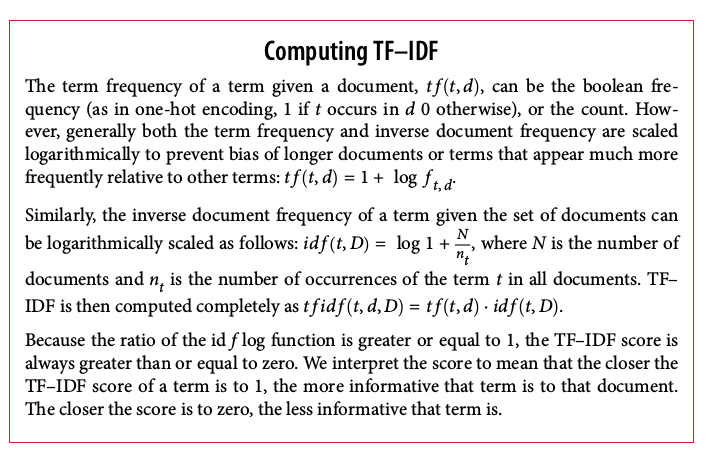

### NLTK

In [241]:
from nltk.text import TextCollection

In [250]:
def tf_idf_nltk(corpus):
    corp = [tokenize(doc) for doc in corpus]
    texts = TextCollection(corp)
    for doc in corp:
        yield {
            term: texts.tf_idf(term, doc)
            for term in doc
        }

In [276]:
texts = TextCollection(corpus)
texts

<Text: T h e   e l e p...>

In [277]:
#smth wrong((((
doc = corpus[0]
[texts.tf_idf(token, doc) for token in doc]

[0.01894159118393293,
 0.0,
 0.0,
 0.0,
 0.0,
 0.006990777726002834,
 0.0,
 0.020972333178008503,
 0.0,
 0.027963110904011337,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.006990777726002834,
 0.0,
 0.013981555452005669,
 0.0,
 0.027963110904011337,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01894159118393293,
 0.0,
 0.020972333178008503,
 0.0,
 0.0,
 0.027963110904011337,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.027963110904011337,
 0.0,
 0.0,
 0.020972333178008503,
 0.006990777726002834,
 0.0,
 0.01894159118393293,
 0.0,
 0.0,
 0.0,
 0.013981555452005669,
 0.0]

### Sklearn

In [269]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
corp_tf_if = tfidf.fit_transform(corpus)
corp_tf_if[0].toarray()


array([[0.33382127, 0.33382127, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33382127, 0.33382127, 0.        ,
        0.33382127, 0.33382127, 0.        , 0.        , 0.25387968,
        0.        , 0.33382127, 0.        , 0.39432044, 0.        ,
        0.        , 0.        ]])

In [318]:
pd.DataFrame(
    corp_tf_if.todense(),
    columns=tfidf.get_feature_names()
)

,as,at,bat,bats,can,door,echolocation,elephant,of,opened,...,see,she,sight,sneeze,sneezed,studio,the,to,via,wondering
0,0.333821,0.333821,0.000000,0.000000,0.000000,0.000000,0.000000,0.333821,0.333821,0.000000,...,0.000000,0.000000,0.253880,0.000000,0.333821,0.000000,0.394320,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.302514,0.302514,0.302514,0.000000,0.302514,0.000000,0.000000,0.000000,...,0.605027,0.000000,0.230069,0.302514,0.000000,0.000000,0.178669,0.000000,0.302514,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.367724,0.000000,0.000000,0.000000,0.367724,...,0.000000,0.367724,0.000000,0.000000,0.000000,0.367724,0.434367,0.367724,0.000000,0.367724


In [278]:
corp_tf_if[1].toarray()


array([[0.        , 0.        , 0.30251368, 0.30251368, 0.30251368,
        0.        , 0.30251368, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.60502736, 0.        , 0.23006945,
        0.30251368, 0.        , 0.        , 0.17866945, 0.        ,
        0.30251368, 0.        ]])

In [279]:
corp_tf_if[2].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.36772387, 0.        , 0.        , 0.        , 0.36772387,
        0.        , 0.        , 0.        , 0.36772387, 0.        ,
        0.        , 0.        , 0.36772387, 0.43436728, 0.36772387,
        0.        , 0.36772387]])

In [280]:
freqs = vectorize_sklearn(corpus)
freqs.todense()

matrix([[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0,
         0],
        [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1,
         0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0,
         1]])

In [281]:
#????? why dim is 22 not 20 as vocab size

### Gensim

In [285]:
lexicon = gensim.corpora.Dictionary([tokenize(doc) for doc in corpus])
[l for l in lexicon.items()]

[(4, 'potato'),
 (5, 'promis'),
 (17, 'studio'),
 (11, 'echoloc'),
 (0, 'as'),
 (9, 'bat'),
 (7, 'sneez'),
 (13, 'via'),
 (15, 'open'),
 (16, 'she'),
 (12, 'see'),
 (8, 'the'),
 (2, 'eleph'),
 (6, 'sight'),
 (18, 'to'),
 (14, 'door'),
 (1, 'at'),
 (3, 'of'),
 (19, 'wonder'),
 (10, 'can')]

In [291]:
tf_idf_gensim = gensim.models.TfidfModel(dictionary=lexicon, normalize=True)
vecotors = [tf_idf_gensim[lexicon.doc2bow(doc)] for doc in [tokenize(doc) for doc in corpus]]

In [292]:
vecotors

[[(0, 0.39928430322959224),
  (1, 0.39928430322959224),
  (2, 0.39928430322959224),
  (3, 0.39928430322959224),
  (4, 0.39928430322959224),
  (5, 0.39928430322959224),
  (6, 0.1473639561879945),
  (7, 0.1473639561879945)],
 [(6, 0.10992597952954358),
  (7, 0.10992597952954358),
  (9, 0.5956913654963344),
  (10, 0.2978456827481672),
  (11, 0.2978456827481672),
  (12, 0.5956913654963344),
  (13, 0.2978456827481672)],
 [(14, 0.408248290463863),
  (15, 0.408248290463863),
  (16, 0.408248290463863),
  (17, 0.408248290463863),
  (18, 0.408248290463863),
  (19, 0.408248290463863)]]

# 4.Distributed Representation

While frequency, one-hot, and TF–IDF encoding enable us to put documents into
vector space, it is often useful to also encode the similarities between documents in
the context of that same vector space. Unfortunately, these vectorization methods
produce document vectors with <b>non-negative elements</b>, which means we won’t be
able to compare documents that don’t share terms (because two vectors with a cosine
distance of 1 will be considered far apart, even if they are semantically similar). 

Word2vec, created by a team of researchers at Google led by Tomáš Mikolov, imple‐
ments a word embedding model that enables us to create these kinds of distributed
representations. The word2vec algorithm trains word representations based on either
a continuous bag-of-words (CBOW) or skip-gram model, such that words are
embedded in space along with similar words based on their context.

Neither NLTK nor Scikit-Learn provide implementations of these kinds of word
embeddings. Gensim’s implementation allows users to train both word2vec and
doc2vec models on custom corpora and also conveniently comes with a model that is
pretrained on the Google news corpus.

In [294]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec 

In [295]:
corpus_tokenized = [list(tokenize(doc)) for doc in corpus]

In [296]:
corpus_tokenized

[['the',
  'eleph',
  'sneez',
  'at',
  'the',
  'sight',
  'of',
  'potato',
  'as',
  'promis'],
 ['bat',
  'can',
  'see',
  'via',
  'echoloc',
  'see',
  'the',
  'bat',
  'sight',
  'sneez'],
 ['wonder', 'she', 'open', 'the', 'door', 'to', 'the', 'studio']]

In [298]:
corpus_tagged = [
    TaggedDocument(words, ['d{}'.format(idx)])
    for idx, words in enumerate(corpus_tokenized)
]

corpus_tagged

[TaggedDocument(words=['the', 'eleph', 'sneez', 'at', 'the', 'sight', 'of', 'potato', 'as', 'promis'], tags=['d0']),
 TaggedDocument(words=['bat', 'can', 'see', 'via', 'echoloc', 'see', 'the', 'bat', 'sight', 'sneez'], tags=['d1']),
 TaggedDocument(words=['wonder', 'she', 'open', 'the', 'door', 'to', 'the', 'studio'], tags=['d2'])]

In [307]:
model = Doc2Vec(corpus_tagged, size=8)
model.docvecs[0]

array([ 0.03752895,  0.03408334, -0.05517091,  0.01732463, -0.03726776,
       -0.03113534,  0.06097883, -0.03346945], dtype=float32)

In [308]:
model.docvecs[1]

array([ 0.05935048,  0.01643289,  0.05652129, -0.04558019,  0.05451574,
        0.05211021,  0.01446601,  0.00479959], dtype=float32)

In [309]:
model.docvecs[2]

array([-0.01585715, -0.05876537, -0.01375739, -0.00105622, -0.02813986,
        0.0092517 ,  0.00493175,  0.04358973], dtype=float32)

Distributed representations will dramatically improve results over TF–IDF models
when used correctly. The model itself can be saved to disk and retrained in an active
fashion, making it extremely flexible for a variety of use cases. However, on big
data, training can be slow and memory intensive, and it might not be as good as a
<b>TF–IDF model with Principal Component Analysis (PCA) or Singular Value Decom‐
position (SVD) applied to reduce the feature space</b>. In the end, however, this repre‐
sentation is breakthrough work that has led to a dramatic improvement in text
processing capabilities of data products in recent years.

# Overview

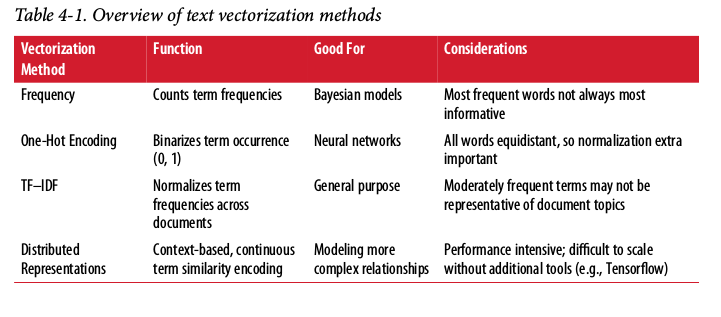